In [2]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
ff1.plotting.setup_mpl()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import os
import pickle

import numpy as np
import pandas as pd
ff1.Cache.enable_cache('C:/Users/benme/OneDrive - The Perse School/Formula 1')

In [ ]:
qualifying = ff1.get_session(2020, 'Austrian', 'Q')
qualifying.load()

race = ff1.get_session(2020, 'Austrian', 'R')
race.load()

In [25]:
race_laps = race.laps.filter(items = ['Driver', 'LapNumber', 'LapTime', 'Stint', 'PitOutTime', 'PitInTime'])
race_laps.to_excel('bot test.xlsx')

In [18]:
with open(f'laptimes_Austrian_2020.pickle', 'rb') as handle:
    lap_times = pickle.load(handle)

changedNames = {
    "Sauber": "Alfa Romeo"
}

line_width = 6

In [19]:
driver_list = []
for n in range(len(race_laps)):
    driver = race_laps.iloc[n]['Driver']
    if not driver in driver_list:
        driver_list.append(driver)
        quick_lap = qualifying.laps.pick_driver(driver).pick_fastest()['LapTime']

for f in range(len(race_laps)):
    laptime = race_laps.iloc[[f]]['LapTime'].values[0]
    difference = laptime - quick_lap
    race_laps.iloc[f, race_laps.columns.get_loc('LapTime')] = difference

In [20]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [120, 60]
plt.rcParams['text.color'] = 'b'
plt.rcParams['legend.labelcolor'] = 'w'
plt.rcParams['font.size'] = 40

In [21]:
driver_list = ['BOT', 'LEC']

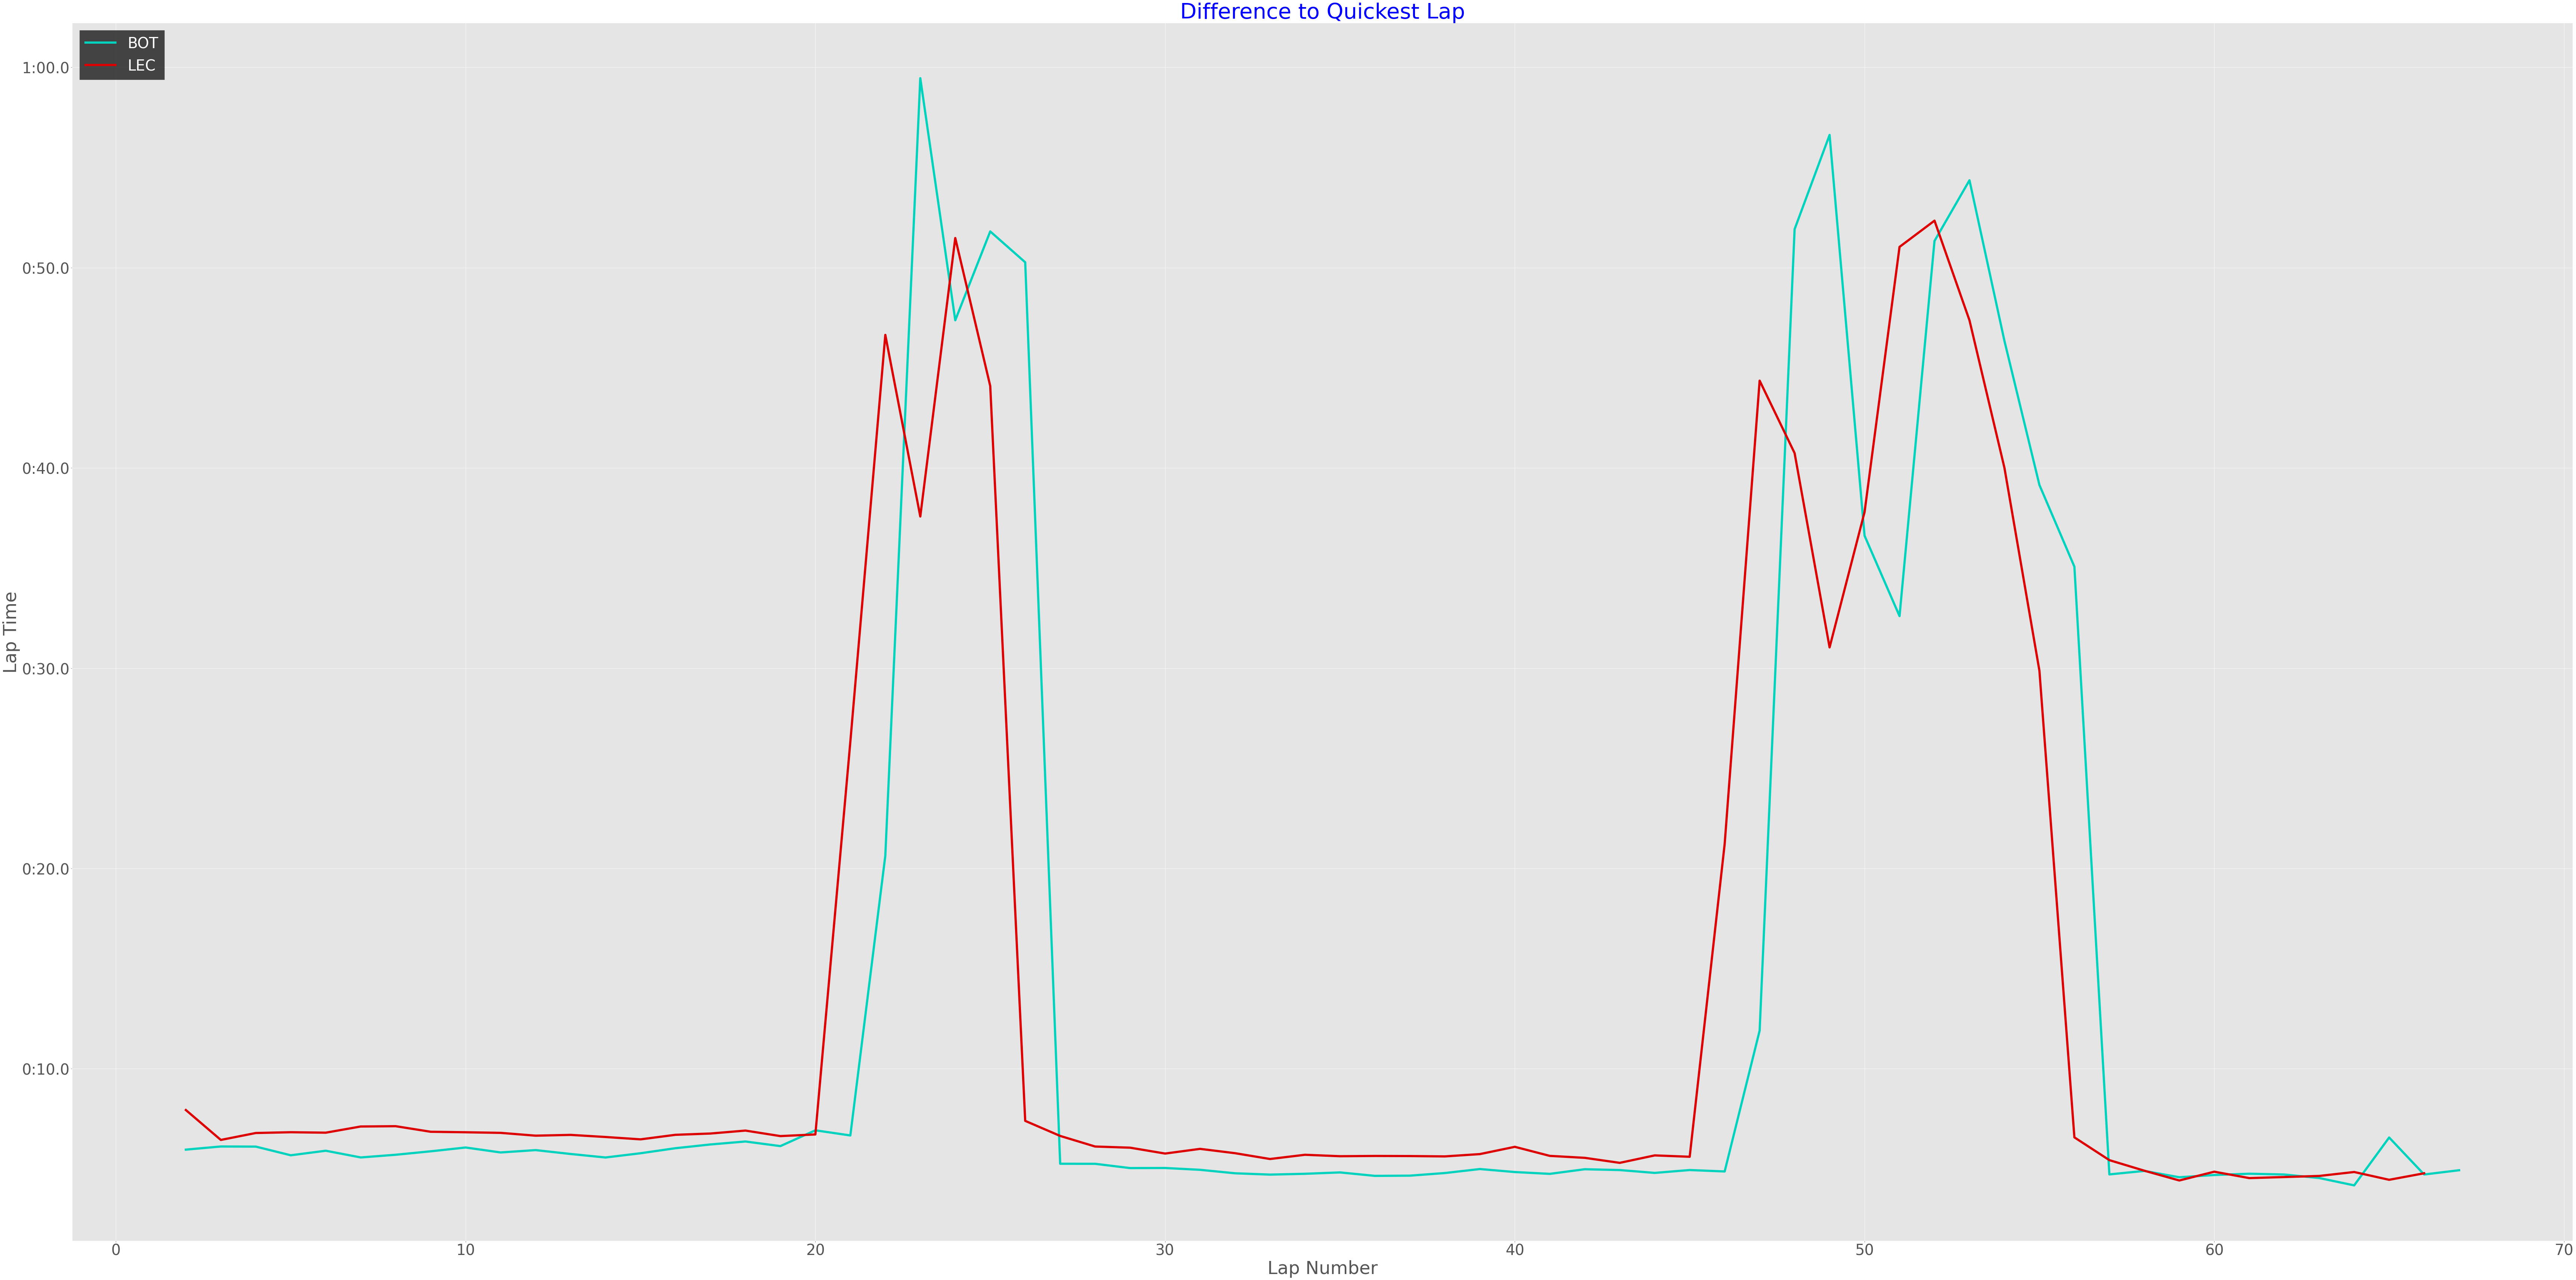

In [22]:
for n in driver_list:
    if driver != n:
        driver = n

        laps = race_laps.pick_driver(driver)

        team = race.laps.pick_driver(driver).pick_fastest()['Team']
        if team in changedNames:
            team = changedNames[team]

        team_color = ff1.plotting.team_color(team)

        ax = plt.gca()
        ax.plot(laps['LapNumber'], laps['LapTime'],color=team_color, label=driver, linewidth = line_width)
        ax.set(xlabel='Lap Number', ylabel='Lap Time', title=f"Difference to Quickest Lap")
        ax.legend(loc='upper left')


plt.savefig('output.png')